In [1]:
import numpy as np
import scipy as sp
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from ipywidgets import interact
from os import path
from scipy.integrate import quad, nquad
from scipy.special import gamma

elapsed time = 5.75 sec
elapsed time = 4.75 sec
elapsed time = 5.58 sec
elapsed time = 4.68 sec


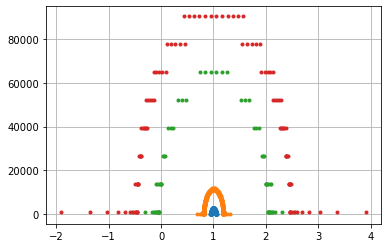

In [115]:
mu=2
beta = 3
eS0= 2**10
r= lambda s: eS0*s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
zmax=5
Z1= nquad(dz, [[0, zmax]])[0]

w= lambda s: y(s)/Z1


# La=2**10
# La2=2**5
# Lalist=[2**15]
Lalist=[2**6,2**10,2**15,2**16]

plt.figure()
for La in Lalist:
    La2=sqrt(La)
    
    def integrand_re(z,R):
        return np.real(r(z)*w(z)*(1+w(z)*R)/(La2**2-(w(z)*R)**2) )

    def integrand_im(z,R):
        return np.imag(r(z)*w(z)*(1+w(z)*R)/(La2**2-(w(z)*R)**2) )

    def Zn_calc(R):
        '''Calculates Zn'''
        options={'limit':20}
        integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
        integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
        return integral_re+1j*integral_im

    if La==2**4:
        Rlist_re= np.linspace(-1,1,30)*1.5e3
        Rlist_im= np.linspace(0.01,1.5,40)*1e3
    elif La==2**6:
        Rlist_re= np.linspace(-3,3,30)*1e3 # 6 qubits
        Rlist_im= np.linspace(0.01,3,40)*1e3
    elif La==2**8:
        Rlist_re= np.linspace(-1,1,30)*7e3
        Rlist_im= np.linspace(0.01,7,40)*1e3
    elif La==2**10:
        Rlist_re= np.linspace(-1.5,1.5,30)*1e4
        Rlist_im= np.linspace(0.01,1.2,40)*1e4
    elif La==2**12:
        Rlist_re= np.linspace(-2.2,2.2,30)*1e4
        Rlist_im= np.linspace(0.01,2.5,40)*1e4
    elif La==2**14:
        Rlist_re= np.linspace(-4.2,4.2,30)*1e4
        Rlist_im= np.linspace(0.01,5,40)*1e4
    else:
        Rlist_re= np.linspace(-1,1,30)*1e5
        Rlist_im= np.linspace(0.01,5,40)*1e5
     
    t_timer=time.time()

    lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)
    for i_r in range(len(Rlist_re)):
        Rr=Rlist_re[i_r]
        for i_i in range(len(Rlist_im)):
            Ri=Rlist_im[i_i]
    #         lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+r0*w0/k/(1-w0*(1j*Ri+Rr))
            lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+Zn_calc(1j*Ri+Rr)*La2**2/La

    elapsed = time.time() - t_timer
    print("elapsed time = %.2f " % (elapsed) + "sec")
    if La <= eS0:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-5)
    else:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<2e-6)

#     plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
    plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
# plt.ylim(-2e3,8e3)
#     plt.xlim(0.9,1.1)
#     plt.ylim(0,4e3)

plt.grid()
plt.show()


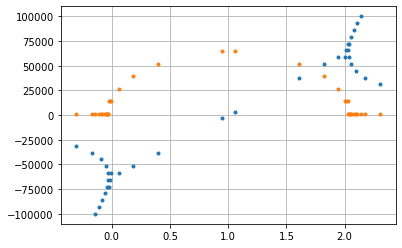

In [114]:
plt.figure()
inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
# inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
# # plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
# plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
plt.grid()
# plt.xlim(0.9,1.1)
plt.show()
# print(Rres_list)

elapsed time = 13.71 sec
elapsed time = 12.66 sec
elapsed time = 8.95 sec
elapsed time = 5.56 sec


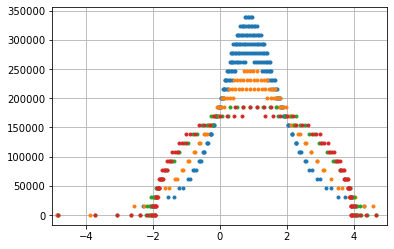

In [145]:
mu=2
beta = 3
eS0= 2**10
r= lambda s: eS0*s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
zmax=5
Z1= nquad(dz, [[0, zmax]])[0]

w= lambda s: y(s)/Z1


La=2**18
La2list=2**np.array([3,4,6,8])

plt.figure()
for La2 in La2list:
    
    def integrand_re(z,R):
        return np.real(r(z)*w(z)*(1+w(z)*R)/(La2**2-(w(z)*R)**2) )

    def integrand_im(z,R):
        return np.imag(r(z)*w(z)*(1+w(z)*R)/(La2**2-(w(z)*R)**2) )

    def Zn_calc(R):
        '''Calculates Zn'''
        options={'limit':20}
        integral_re= nquad(integrand_re, [[0, zmax]], args=(R,),opts=[options,options])[0]
        integral_im= nquad(integrand_im, [[0, zmax]], args=(R,),opts=[options,options])[0]
        return integral_re+1j*integral_im

#     if La==2**4:
    Rlist_re= np.linspace(-2,2,30)*1e5
    Rlist_im= np.linspace(1e-3,6,40)*1e5

    t_timer=time.time()

    lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)
    for i_r in range(len(Rlist_re)):
        Rr=Rlist_re[i_r]
        for i_i in range(len(Rlist_im)):
            Ri=Rlist_im[i_i]
    #         lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+r0*w0/k/(1-w0*(1j*Ri+Rr))
            lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+Zn_calc(1j*Ri+Rr)*La2**2/La

    elapsed = time.time() - t_timer
    print("elapsed time = %.2f " % (elapsed) + "sec")
    if La <= eS0:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-5)
    else:
        inds= np.argwhere(np.abs(np.imag(lmbda_list))<6e-7)

#     plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
    plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
# plt.ylim(-2e3,8e3)
#     plt.xlim(0.9,1.1)
#     plt.ylim(0,4e3)
    plt.xlim(-5,5)

plt.grid()
plt.show()


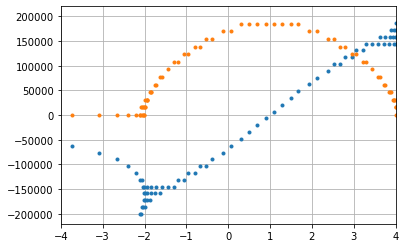

In [144]:
plt.figure()
inds= np.argwhere(np.abs(np.imag(lmbda_list))<4e-7)
plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=3)
plt.plot(La*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=3)
plt.grid()
plt.xlim(-4,4)
plt.show()
# print(Rres_list)

/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (20) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


a = 0.03, b = 0.25 elapsed time = 13.14 sec


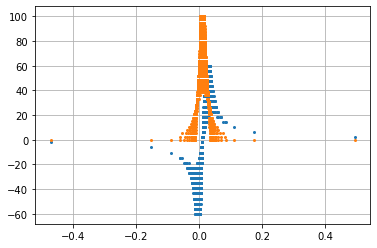

In [252]:
# rescaled

mu=2
beta = 3
r= lambda s: s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2

dz= lambda x: r(x)*y(x)
zmax= 5
Z1= nquad(dz, [[0, zmax]])[0]

def integrand_re(z,a,b,R):
    return np.real(r(z)*y(z)*(a+b*y(z)*R)/(1-(y(z)*R)**2) )

def integrand_im(z,a,b,R):
    return np.imag(r(z)*y(z)*(a+b*y(z)*R)/(1-(y(z)*R)**2) )

def Zn_calc(a,b,R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(a,b,R),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(a,b,R),opts=[options,options])[0]
    return integral_re+1j*integral_im

# V = 28
# Ra= 0.8
# R12= 0.1
# a= 2**((1-Ra)*V-(1-R12)*Ra*V) # Lb/L2
# b= a*2**(R12*Ra*V) # Lb L1/L2
Nb=10
Na=18
Na1=3
Na2=Na-Na1
a= 2**(Nb-Na2)
b= 2**(Nb-Na2+Na1)

plt.figure()

#     Rlist_re= np.linspace(-10,8,30) 
Rlist_re= np.linspace(-1,1,30)*6e1
Rlist_im= np.linspace(0.01,100,40)

t_timer=time.time()

lmbda_list= np.zeros((len(Rlist_re),len(Rlist_im)), dtype=np.complex128)
for i_r in range(len(Rlist_re)):
    Rr=Rlist_re[i_r]
    for i_i in range(len(Rlist_im)):
        Ri=Rlist_im[i_i]
        lmbda_list[i_r,i_i]= 1/(1j*Ri+Rr)+Zn_calc(a,b,1j*Ri+Rr)

elapsed = time.time() - t_timer
print("a = %.2f, b = %.2f " % (a,b) + "elapsed time = %.2f " % (elapsed) + "sec")
inds= np.argwhere(np.abs(np.imag(lmbda_list))<2e-2)

plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)

plt.grid()
plt.show()

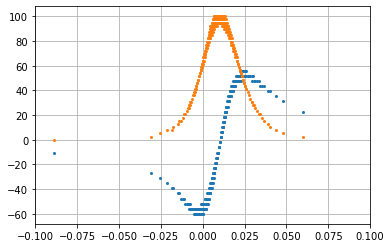

In [257]:
plt.figure()
inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-3)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)
plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]],'o',markersize=2)
plt.plot(np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]],'o',markersize=2)
plt.grid()
plt.xlim(-0.1,0.1)
plt.show()
# print(Rres_list)

In [265]:
# rescaled

mu=2
beta = 3
r= lambda s: s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2
options={'limit':500}
dz= lambda x: r(x)*y(x)
zmax=5
Z1_norm= nquad(dz, [[0, zmax]])[0]

def integrand_re(z,La2,R):
    return np.real(r(z)*y(z)*(1+La2*y(z)*R)/(1-(y(z)*R)**2) )

def integrand_im(z,La2,R):
    return np.imag(r(z)*y(z)*(1+La2*y(z)*R)/(1-(y(z)*R)**2) )

def Zn_calc(La2,R):
    '''Calculates Zn'''
    options={'limit':20}
    integral_re= nquad(integrand_re, [[0, zmax]], args=(La2,R),opts=[options,options])[0]
    integral_im= nquad(integrand_im, [[0, zmax]], args=(La2,R),opts=[options,options])[0]
    return integral_re+1j*integral_im

from scipy.optimize import fsolve, fmin_cobyla, fmin
def constr1(x):
    return x-0.1

Rlist= np.linspace(-1,1,40)*6e1
def neg_spec_finder(a,b,R_guess):
    '''
    b: LB LA2/LA1
    a: LB/LA1
    '''
    lmbda_list= np.zeros(len(Rlist))
    Rres_list= np.zeros(len(Rlist))

    for i_im in range(len(Rlist)):
        R= Rlist[i_im]
        print(i_im,end='\r')
        lmin = lambda x: 1/(1j*x+R) + Zn_calc(b/a,1j*x+R)*a
        lmin_im= lambda x: np.abs(np.imag(lmin(x)))
#         R_guess=1
#         R_result= fmin_cobyla(lmin_im, R_guess, constr1)#, rhoend=1e-3)
        R_result= fmin(lmin_im, R_guess,disp=False)
    #     if lmin_im(R_result)<1e-1:
        lmbda_list[i_im]=np.real(lmin(R_result))
        Rres_list[i_im]=R_result
    return lmbda_list,Rres_list

# V = 28
# Ra= 0.8
# R12= 0.2
# a= 2**((1-Ra)*V-(1-R12)*Ra*V) # Lb/L2
# b= a*2**(R12*Ra*V) # Lb L1/L2
Nb=10
Na=18
Na1=4
Na2=Na-Na1
a= 2**(Nb-Na2)
b= 2**(Nb-Na2+Na1)
lmbda_list_eq,Rres_list = neg_spec_finder(a,b,R_guess=100)
lmbda_list_eq2,Rres_list2 = neg_spec_finder(a,b,R_guess=1)


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (20) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


/gscratch/home/hshapourian/miniconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


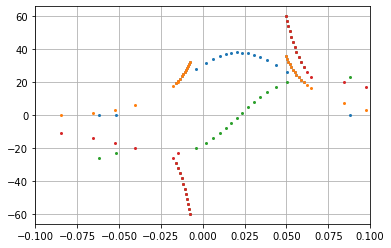

In [269]:
# inds= np.argwhere(np.abs(np.imag(lmbda_list))<6e-4)


# from scipy.interpolate import interp1d, UnivariateSpline
# xlist=np.concatenate((lmbda_list_eq,lmbda_list_eq2))
# ylist=np.concatenate((Rres_list,Rres_list2)) 
# # xlist=np.real(lmbda_list[inds[:,0],inds[:,1]])
# # ylist=Rlist_im[inds[:,1]]
# i_x=np.argsort(xlist)
# xlist=xlist[i_x]
# ylist=ylist[i_x]
# f = interp1d(xlist, ylist)
# # f = UnivariateSpline(xlist, ylist)
# xplot=np.linspace(xlist.min(),xlist.max(),2000)
# yplot=f(xplot)

plt.figure()
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]]*Z1/kdS,'v',markersize=2)
# plt.plot(kdS/Z1*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]*Z1/kdS,'v',markersize=2)
# plt.plot(kdS/Z1*xplot,yplot*Z1/kdS,'-',markersize=2)

# inds= np.argwhere(np.abs(np.imag(lmbda_list))<1e-6)
# plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_re[inds[:,0]]/k,'v',markersize=3)
# plt.plot(k*np.real(lmbda_list[inds[:,0],inds[:,1]]),Rlist_im[inds[:,1]]/k,'v',markersize=3)

# plt.plot((a/b)/Z1_norm*lmbda_list_eq,Rres_list*Z1_norm*b/a,'o',markersize=2)
plt.plot(lmbda_list_eq,Rres_list,'o',markersize=2)
plt.plot(lmbda_list_eq2,Rres_list2,'o',markersize=2)
# plt.plot((a/b)/Z1_norm*lmbda_list_eq2,Rres_list2*Z1_norm*b/a,'o',markersize=2)
plt.plot(lmbda_list_eq,Rlist,'o',markersize=2)
plt.plot(lmbda_list_eq2,Rlist,'o',markersize=2)

plt.xlim(-0.1,0.1)
plt.grid()
plt.show()